# Part 1: Reading Files and Inspecting Data
## Washington DC Taxi Data Exploratory Analysis

Created by Joshua Malamud

# Table of Contents

Download Taxi Data

1. Import Libraries

2. Clear Local Data from Previous Project Iteration

3. Read in Data from Local Folder

    * 3.1 Unzip and Read in Data to Local Folder

    * 3.2 Load Multiple Files into Single Dataframe

    * 3.3 Combine Monthly Trips into Concatenated Dataframe

4. Inspect Data for Nulls and Correlation

5. Conclusion

**Primary Libraries:** <br>Pandas used to read in and manipulate open source data. Matplotlib used to visualize data inspection. 

# Download Taxi Data
Monthly taxi data is available through the [Open Data DC portal](https://opendata.dc.gov/) going back to 2018. Search for "taxi trips in 2023" to download a zip file with monthly taxi trips for 2023. 
<br><br>![image](images/1.open-data-dc-taxi-trips-2023.PNG)

Selecting **Taxi Trips in 2023** will route you to a Box download page and you can select **Download** to download a zip file to your local downloads folder.
<br><br>![image](images/2.trips-download-file.PNG)
<br><br>Move downloaded zip file to desired project folder for data analysis.



# 1. Import Libraries

In [1]:
# import libraries
import os
from pathlib import Path
import pandas as pd 
import urllib
import json
import zipfile
from zipfile import ZipFile
import glob
import seaborn as sns
from openpyxl import Workbook
import matplotlib.pyplot as plt


# 2. Clear Local Data from Previous Project Iteration

In [2]:
# clear folder from previous project iteration leaving only trip data zip file
dir_name = r"C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data"

folder = os.listdir(dir_name)

for item in folder:
    if item.endswith(".csv") or item.endswith(".txt"):
        os.remove(os.path.join(dir_name, item))

# 3. Read in Data from Local Folder
## 3.1 Unzip and Read in Data to Local Folder

In [3]:
# assign path to data folder
data_path = r"C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data"

# file name to download
file = "OpenDataDC_Taxi_2023.zip"

# establish file path
fullfilename = os.path.join(data_path, file)

# assign ZIP file to variable
items = zipfile.ZipFile(fullfilename)

# show files in ZIP
print(items.namelist())

# open ZIP file in read mode and extract all files inside the ZIP file
with zipfile.ZipFile(fullfilename, "r") as file:
    file.extractall(data_path)

['README_DC_Taxicab_trip.txt', 'taxi_202301.csv', 'taxi_202302.csv', 'taxi_202303.csv', 'taxi_202304.csv', 'taxi_202305.csv', 'taxi_202306.csv', 'taxi_202307.csv', 'taxi_202308.csv', 'taxi_202309.csv', 'taxi_202310.csv', 'taxi_202311.csv', 'taxi_202312.csv']


## 3.2 Load Multiple Files into Single Dataframe

In [4]:
# load monthly files into a single df and visualize process using glob library
all_dfs = []
for one_filename in glob.glob(r'C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data\taxi*.csv'):
    #print(f'Loading {one_filename}')
    new_df= pd.read_csv(one_filename,
# select columns necessary for analysis to consolidate df
                 usecols=['OBJECTID', 'ORIGINDATETIME_TR', 'DESTINATIONDATETIME_TR', 'ORIGINZIP', 'DESTINATIONZIP', 'MILEAGE', 'DURATION', 'FAREAMOUNT', 'ORIGIN_BLOCK_LATITUDE', 'ORIGIN_BLOCK_LONGITUDE', 'ORIGINZIP']) 
    all_dfs.append(new_df)

len(all_dfs)

12

## 3.3 Combine Monthly Trips into Concatenated Dataframe

In [ ]:
# combine multiple dataframes into one and preview data
taxi_trips = pd.concat(all_dfs)

rows, columns = taxi_trips.shape
print('rows: {:,}\ncolumns: {}'.format(rows, columns))

taxi_trips

rows: 3,092,555
columns: 10


,OBJECTID,FAREAMOUNT,ORIGINZIP,DESTINATIONZIP,MILEAGE,DURATION,ORIGIN_BLOCK_LATITUDE,ORIGIN_BLOCK_LONGITUDE,ORIGINDATETIME_TR,DESTINATIONDATETIME_TR
0,1,15.79,2DA,22202,5.76000,852.0,38.896733,-77.009058,01/01/2023 00:00,01/01/2023 00:00
1,2,10.81,20011,20011,3.11000,650.0,38.952536,-77.003107,01/01/2023 00:00,01/01/2023 00:00
2,3,13.51,20001,20007,4.80000,539.0,NaN,NaN,01/01/2023 00:00,01/01/2023 00:00
3,4,12.97,20005,20024,2.68000,1187.0,38.901925,-77.033638,01/01/2023 00:00,01/01/2023 00:00
4,5,16.48,20001,20002,5.76000,876.0,NaN,NaN,01/01/2023 00:00,01/01/2023 00:00
...,...,...,...,...,...,...,...,...,...,...
199303,199304,40.24,20004,20011,9.63000,3024.0,38.895463,-77.021917,12/31/2023 23:00,01/01/2024 00:00
199304,199305,10.00,20002,20002,0.00000,106.0,38.901547,-76.979938,12/31/2023 23:00,12/31/2023 23:00
199305,199306,12.47,20002,20037,2.73000,1078.0,38.897204,-77.008388,12/31/2023 23:00,12/31/2023 23:00
199306,199307,15.67,20002,20010,3.54000,1269.0,38.897204,-77.008388,12/31/2023 23:00,01/01/2024 00:00


# 4. Inspect Data for Nulls and Correlation

OBJECTID                   0.000000
FAREAMOUNT                 7.336038
ORIGINZIP                  0.000000
DESTINATIONZIP             0.000000
MILEAGE                    0.000000
DURATION                   0.000776
ORIGIN_BLOCK_LATITUDE     16.198063
ORIGIN_BLOCK_LONGITUDE    16.198063
ORIGINDATETIME_TR          0.000000
DESTINATIONDATETIME_TR     0.000000
dtype: float64


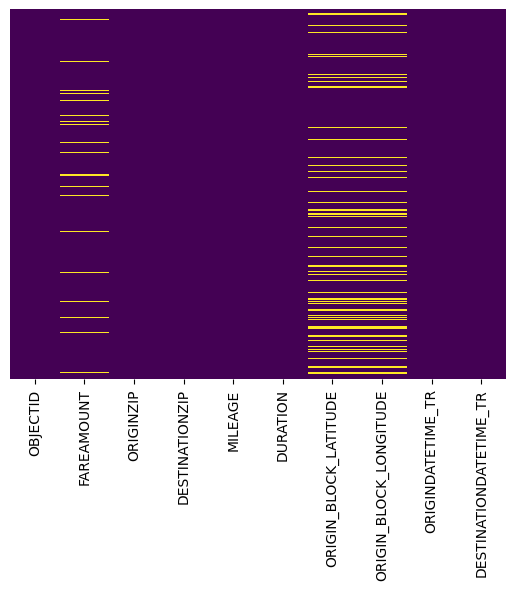

In [ ]:
# find missing values, shown as percentage
sns.heatmap(taxi_trips.isnull(), yticklabels=False, cbar=False, cmap="viridis")
# visualize missing values as heatmap to show where nulls fall througout date range
print((taxi_trips.isnull().sum() / len(taxi_trips.index)) * 100)

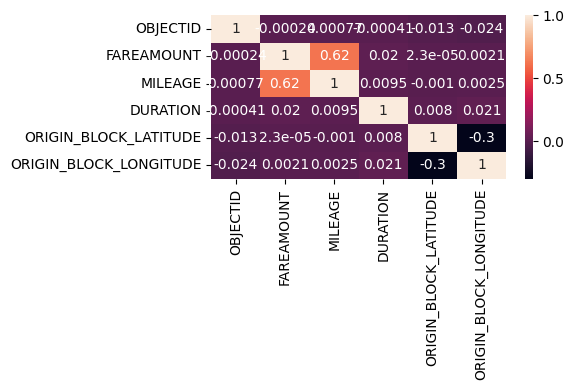

In [ ]:
# display field correlation as heat map and display blank cell if all column values are null
fig, ax = plt.subplots(figsize=(6, 4))

sns.heatmap(
    taxi_trips.corr(numeric_only=True), 
    annot=True, 
    ax=ax
)

plt.tight_layout()

# 5. Conclusion
This notebook provides a workflow to download a full year of taxi data, load the separate years of data into a single pandas dataframe, and inspect the data for missing values and potential correlation between fields. 